In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-03-03 22:36:37.264943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 22:36:37.265040: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 8s 1us/step


In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
X_train = X_train/255
X_test = X_test/255

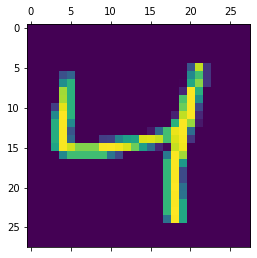

In [19]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# Convert two dimentional array into one dimensional array -- flatten
X_train.shape

(60000, 28, 28)

In [20]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

2022-03-03 22:52:54.942203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4763 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2662 - accuracy: 0.9260


In [23]:
model.evaluate(X_test_flattened, y_test)

2022-03-03 22:54:02.131289: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9264


[0.26713982224464417, 0.9264000058174133]

In [24]:
y_predicted = model.predict(X_test_flattened)

2022-03-03 22:55:32.859162: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [25]:
y_predicted[1]

array([3.1212389e-01, 6.0231090e-03, 9.9974239e-01, 3.0423421e-01,
       4.0499140e-10, 8.6161101e-01, 8.5137337e-01, 9.7111100e-13,
       1.1924371e-01, 3.1825829e-09], dtype=float32)

In [27]:
np.argmax(y_predicted[1])

2

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [34]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  942,   11,    7,    6,   12,   10,   26,    5],
       [   4,    0,   26,  903,    0,   36,    2,   12,   18,    9],
       [   1,    1,    5,    1,  902,    0,   11,    4,    9,   48],
       [   9,    2,    7,   18,    7,  794,   13,    7,   28,    7],
       [  10,    3,    8,    1,    7,   14,  912,    2,    1,    0],
       [   1,    5,   24,    3,    6,    1,    0,  951,    2,   35],
       [   8,    8,    9,   19,    9,   32,    9,   13,  859,    8],
       [  10,    7,    2,    9,   21,    8,    0,   20,    4,  928]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

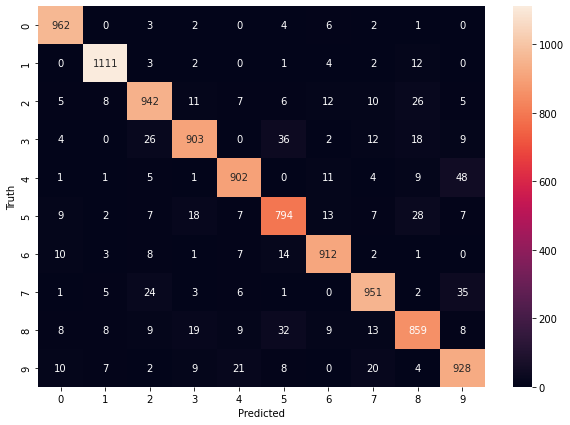

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2694 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1188 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0826 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0623 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0501 - accuracy: 0.9846


Text(69.0, 0.5, 'Truth')

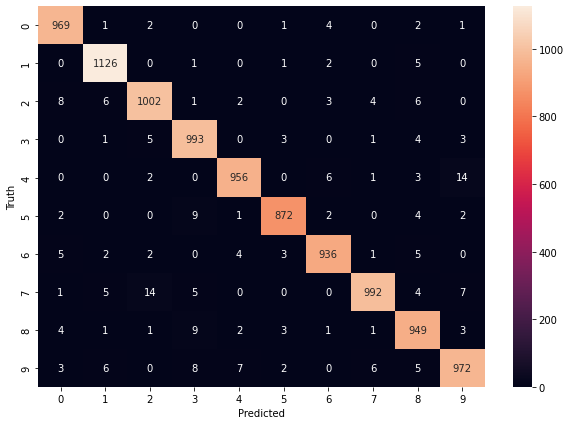

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1234 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0864 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0529 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.020